<a href="https://colab.research.google.com/github/Yana280/Exploratory-and-Sentiment-Data-Analysis-Netflix/blob/main/Netflix_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd # used for data preparation
import numpy as np # linear algebra operations
import seaborn as sns
import plotly.express as px  #data visualisation
import matplotlib.pyplot as plt
from textblob import TextBlob #used for sentiment analysis
%matplotlib inline
sns.set(color_codes=True)

In [ ]:
df=pd.read_csv('/netflix_titles.csv')

In [ ]:
df.shape #number of rows and columns

(8807, 12)

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#####Number of movies/tv shows released throughout the years

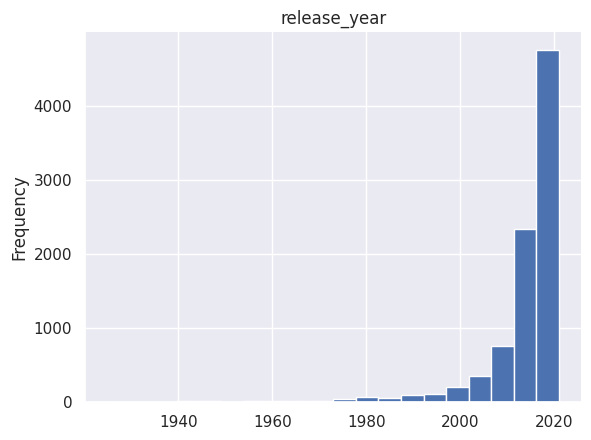

In [ ]:


from matplotlib import pyplot as plt
df['release_year'].plot(kind='hist', bins=20, title='release_year')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

#Taking the count of ratings available

In [ ]:
x= df.groupby(['rating']).size().reset_index(name='counts')
print (x)

      rating  counts
0     66 min       1
1     74 min       1
2     84 min       1
3          G      41
4      NC-17       3
5         NR      80
6         PG     287
7      PG-13     490
8          R     799
9      TV-14    2160
10      TV-G     220
11     TV-MA    3207
12     TV-PG     863
13      TV-Y     307
14     TV-Y7     334
15  TV-Y7-FV       6
16        UR       3


In [ ]:
pieChart=px.pie(x, values='counts',names='rating', title='Distribution of content ratings on netflix')
pieChart.show()

Observations-
Netflix has the highest frequency  Mature adult shows - 36% followed by TV-14- 24.5%

#Analyzing the top 5 Directors

In [ ]:
df['director']=df['director'].fillna('Director not specified')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Director not specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Director not specified,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Director not specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
directors_list=pd.DataFrame()
print(directors_list)

Empty DataFrame
Columns: []
Index: []


In [ ]:
directors_list=df['director'].str.split(',', expand=True).stack()
print(directors_list)

0     0           Kirsten Johnson
1     0    Director not specified
2     0           Julien Leclercq
3     0    Director not specified
4     0    Director not specified
                    ...          
8802  0             David Fincher
8803  0    Director not specified
8804  0           Ruben Fleischer
8805  0              Peter Hewitt
8806  0               Mozez Singh
Length: 9612, dtype: object


In [ ]:
directors_list=directors_list.to_frame()
print(directors_list)

                             0
0    0         Kirsten Johnson
1    0  Director not specified
2    0         Julien Leclercq
3    0  Director not specified
4    0  Director not specified
...                        ...
8802 0           David Fincher
8803 0  Director not specified
8804 0         Ruben Fleischer
8805 0            Peter Hewitt
8806 0             Mozez Singh

[9612 rows x 1 columns]


In [ ]:
directors_list.columns=['Director']
print(directors_list)

                      Director
0    0         Kirsten Johnson
1    0  Director not specified
2    0         Julien Leclercq
3    0  Director not specified
4    0  Director not specified
...                        ...
8802 0           David Fincher
8803 0  Director not specified
8804 0         Ruben Fleischer
8805 0            Peter Hewitt
8806 0             Mozez Singh

[9612 rows x 1 columns]


In [ ]:
directors = directors_list.groupby(['Director']).size().reset_index(name='Total Count')
print(directors)

                       Director  Total Count
0                Aaron Moorhead            2
1                   Aaron Woolf            1
2      Abbas Alibhai Burmawalla            1
3              Abdullah Al Noor            1
4           Abhinav Shiv Tiwari            1
...                         ...          ...
5116                Çagan Irmak            1
5117           Ísold Uggadóttir            1
5118        Óskar Thór Axelsson            1
5119           Ömer Faruk Sorak            2
5120               Şenol Sönmez            2

[5121 rows x 2 columns]


In [ ]:
directors=directors[directors.Director!='Director not specified']
print(directors)

                       Director  Total Count
0                Aaron Moorhead            2
1                   Aaron Woolf            1
2      Abbas Alibhai Burmawalla            1
3              Abdullah Al Noor            1
4           Abhinav Shiv Tiwari            1
...                         ...          ...
5116                Çagan Irmak            1
5117           Ísold Uggadóttir            1
5118        Óskar Thór Axelsson            1
5119           Ömer Faruk Sorak            2
5120               Şenol Sönmez            2

[5120 rows x 2 columns]


In [ ]:
directors=directors.sort_values(by=['Total Count'], ascending=False)
print(directors)

             Director  Total Count
4021    Rajiv Chilaka           22
4068      Raúl Campos           18
261         Jan Suter           18
4652      Suhas Kadav           16
3236     Marcus Raboy           16
...               ...          ...
2341         J. Davis            1
2342  J. Lee Thompson            1
2343  J. Michael Long            1
609    Smriti Keshari            1
2561    Joaquín Mazón            1

[5120 rows x 2 columns]


In [ ]:
top5Directors = directors.head()
print(top5Directors)

           Director  Total Count
4021  Rajiv Chilaka           22
4068    Raúl Campos           18
261       Jan Suter           18
4652    Suhas Kadav           16
3236   Marcus Raboy           16


In [ ]:
top5Directors=top5Directors.sort_values(by=['Total Count'])
barChart= px.bar(top5Directors, x='Total Count', y='Director', title='Top 5 directors on Netflix')
barChart.show()

In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
print(df.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [ ]:
column_name = 'type'  # Replace with your column name
column_data = df[column_name]

print(column_data)

0         Movie
1       TV Show
2       TV Show
3       TV Show
4       TV Show
         ...   
8802      Movie
8803    TV Show
8804      Movie
8805      Movie
8806      Movie
Name: type, Length: 8807, dtype: object


Remove Missing values

In [ ]:
df = df.dropna() # drop rows with nan values
print(df)

     show_id     type                          title                director  \
1         s2  TV Show                  Blood & Water  Director not specified   
4         s5  TV Show                   Kota Factory  Director not specified   
7         s8    Movie                        Sankofa            Haile Gerima   
8         s9  TV Show  The Great British Baking Show         Andy Devonshire   
9        s10    Movie                   The Starling          Theodore Melfi   
...      ...      ...                            ...                     ...   
8801   s8802    Movie                        Zinzana         Majid Al Ansari   
8802   s8803    Movie                         Zodiac           David Fincher   
8804   s8805    Movie                     Zombieland         Ruben Fleischer   
8805   s8806    Movie                           Zoom            Peter Hewitt   
8806   s8807    Movie                         Zubaan             Mozez Singh   

                                       

over the years do shows/movies have an increase in their duration?

In [ ]:
def convert_duration(duration):
    """Convert duration to minutes."""
    if 'min' in duration:
        # Extract the number of minutes
        return int(duration.split(' ')[0])
    elif 'Season' in duration:
        # Convert seasons to minutes (1 season is approximated as 1 week = 7 days * 24 hours * 60 minutes)
        seasons = int(duration.split(' ')[0])
        return seasons * 7 * 24 * 60  # Approximate total minutes in seasons
    return None


In [ ]:
# Apply the conversion
df['duration_numeric'] = df['duration'].apply(convert_duration)

# Drop rows where conversion failed (NaN values)
df_cleaned = df.dropna(subset=['duration_numeric'])

# Preview the cleaned data
print(df_cleaned[['duration', 'duration_numeric']].head())


    duration  duration_numeric
1  2 Seasons             20160
4  2 Seasons             20160
7    125 min               125
8  9 Seasons             90720
9    104 min               104


<ipython-input-27-91537a064438>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



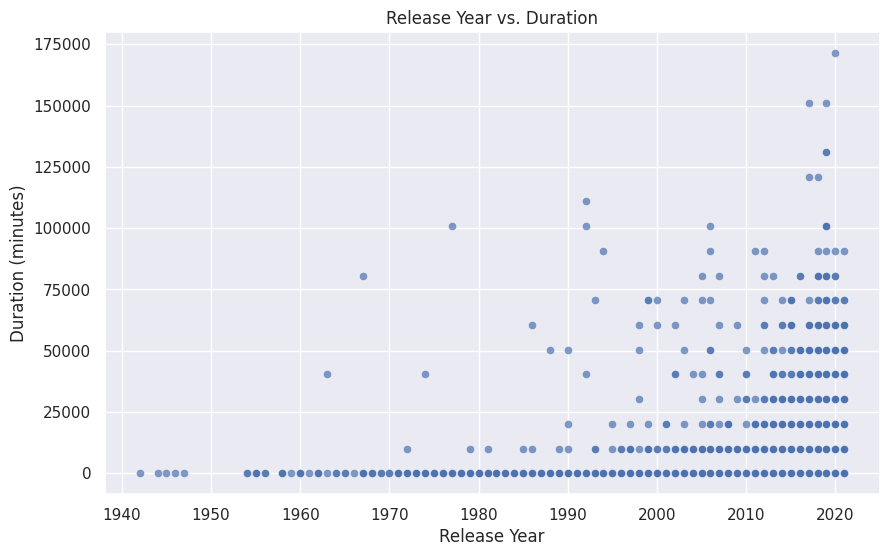

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='release_year', y='duration_numeric', alpha=0.7)

# Add titles and labels
plt.title('Release Year vs. Duration')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.grid(True)

# Show plot
plt.show()

In [ ]:
# Define a function to convert duration to minutes
def convert_duration(duration):
    """Convert duration to minutes."""
    if pd.isna(duration):
        return None
    duration = str(duration)
    if 'min' in duration:
        # Extract the number of minutes
        return int(duration.split(' ')[0])
    elif 'Season' in duration:
        # Convert seasons to minutes (1 season is approximated as 1 week = 7 days * 24 hours * 60 minutes)
        seasons = int(duration.split(' ')[0])
        return seasons * 7 * 24 * 60  # Approximate total minutes in seasons
    return None

# Apply the conversion function
df['duration_numeric'] = df['duration'].apply(convert_duration)

# Remove rows with NaN values in 'release_year' or 'duration_numeric'
df_cleaned = df.dropna(subset=['release_year', 'duration_numeric'])

# Preview the cleaned DataFrame
print(df_cleaned)


     show_id     type                          title                director  \
1         s2  TV Show                  Blood & Water  Director not specified   
4         s5  TV Show                   Kota Factory  Director not specified   
7         s8    Movie                        Sankofa            Haile Gerima   
8         s9  TV Show  The Great British Baking Show         Andy Devonshire   
9        s10    Movie                   The Starling          Theodore Melfi   
...      ...      ...                            ...                     ...   
8801   s8802    Movie                        Zinzana         Majid Al Ansari   
8802   s8803    Movie                         Zodiac           David Fincher   
8804   s8805    Movie                     Zombieland         Ruben Fleischer   
8805   s8806    Movie                           Zoom            Peter Hewitt   
8806   s8807    Movie                         Zubaan             Mozez Singh   

                                       

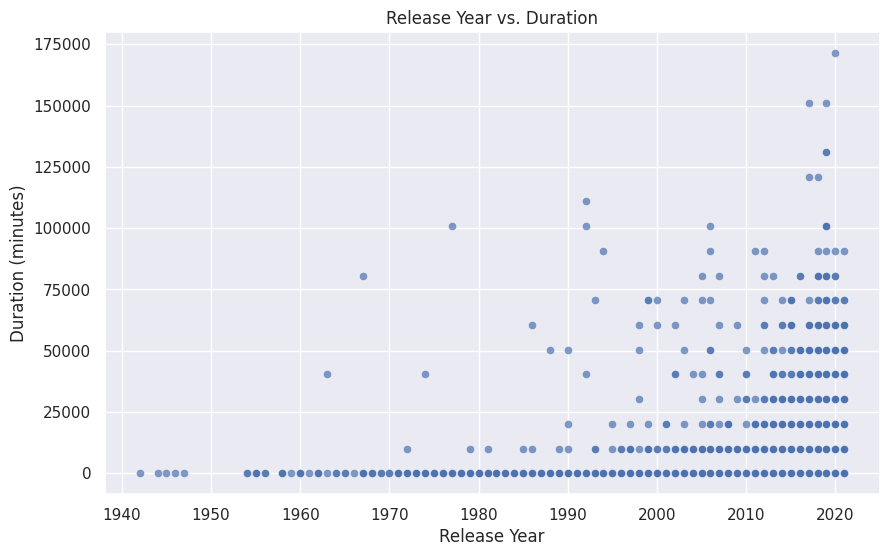

In [ ]:
import seaborn as sns

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='release_year', y='duration_numeric', alpha=0.7)
plt.title('Release Year vs. Duration')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.grid(True)
plt.show()


In [ ]:
# Remove rows where 'release_year' or 'duration_numeric' is NaN
df_cleaned = df.dropna(subset=['release_year', 'duration_numeric'])


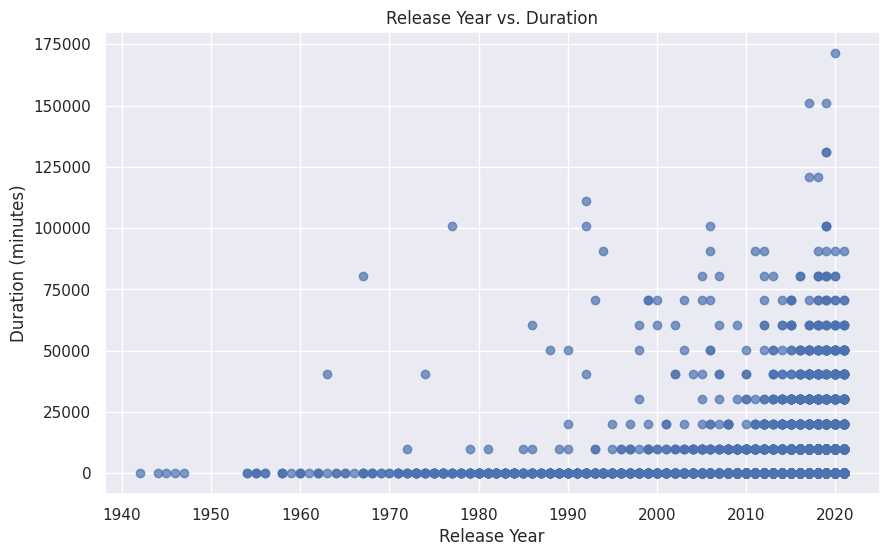

In [ ]:
import matplotlib.pyplot as plt

# Plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['release_year'], df_cleaned['duration_numeric'], alpha=0.7)
plt.title('Release Year vs. Duration')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.grid(True)
plt.show()


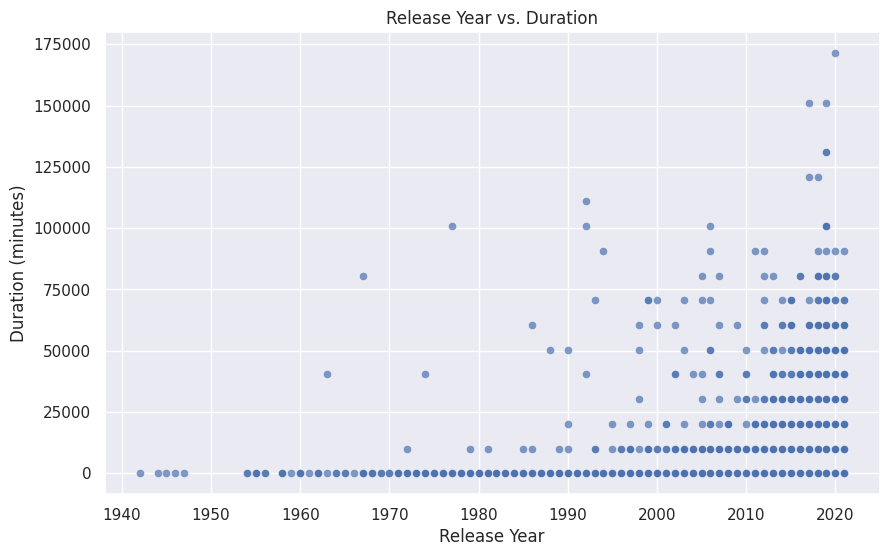

In [ ]:
import seaborn as sns

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='release_year', y='duration_numeric', alpha=0.7)
plt.title('Release Year vs. Duration')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.grid(True)
plt.show()


Most successful actors on netflix

In [ ]:
df['cast']=df['cast'].fillna('cast not specified')
cast_df=pd.DataFrame()
cast_df=df['cast'].str.split(',', expand=True).stack()
cast_df=cast_df.to_frame()
cast_df.columns=['Actor']
actors=cast_df.groupby(['Actor']).size().reset_index(name='Total Count')
actors=actors[actors.Actor!='cast not specified']
actors=actors.sort_values(by=['Total Count'], ascending=False)
top5Actors=actors.head()
top5Actors=top5Actors.sort_values(by=['Total Count'])
barChart2= px.bar(top5Actors, x='Total Count', y='Actor', title='Top 5 actors on Netflix')
barChart2.show()

# Analyzing the content produced on netflix based on years

In [ ]:
df1=df[['type','release_year']]
df1= df1.rename(columns={"release_year":"Release Year","type":"Type"})
df2= df1.groupby(['Release Year','Type']).size().reset_index(name='Total Count')

In [ ]:
print (df2)

     Release Year     Type  Total Counts
0            1942    Movie             1
1            1944    Movie             1
2            1945    Movie             1
3            1946    Movie             1
4            1947    Movie             1
..            ...      ...           ...
109          2019  TV Show           309
110          2020    Movie           417
111          2020  TV Show           327
112          2021    Movie           152
113          2021  TV Show           183

[114 rows x 3 columns]


In [ ]:
df2=df2[df2['Release Year']>=2000]
graph= px.line(df2,x='Release Year', y='Total Count', color='Type', title='Content produced on netflix based on years')
graph.show()

#Sentiment analysis on netflix content

In [ ]:
from os import name
df3=df[['release_year','description']]
df3=df3.rename(columns={"release_year":"Release Year","description":"Description"})
for index, row in df3.iterrows():
  d=row['Description']
  testimonial=TextBlob(d)
  p=testimonial.sentiment.polarity
  if p==0:
    sent='Neutral'
  elif p>0:
    sent='Positive'
  else:
    sent='Negative'
  df3.loc[index,'Sentiment']=sent
df3=df3.groupby(['Release Year','Sentiment']).size().reset_index(name='Total Count')
df3=df3[df3['Release Year']>=2005]
barGraph=px.bar(df3, x='Release Year', y='Total Count', color='Sentiment', title='Sentiment analysis on netflix content')
barGraph.show()